**CHURN PREDICTION USING SUPERVISED LEARNING**

**Import library**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import data**

In [14]:
df = pd.read_excel('churn_prediction.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# STEP 1: DATA PROCESSING:

**Check imbalanced data**

<Axes: xlabel='Churn', ylabel='count'>

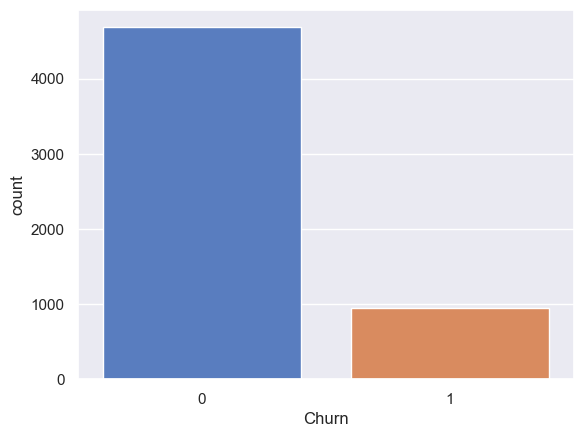

In [15]:
# Thấy số lượng khách hàng churn / tổng số khách hàng = 948 / 5630 = 16.83%.
# => Quite imbalanced data
sns.countplot(x='Churn', data=df)

In [16]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [17]:
df.info()
df.drop("CustomerID", axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## 1. OUTLIER: Visualization to detect outliers - Handle outliers using IQR method

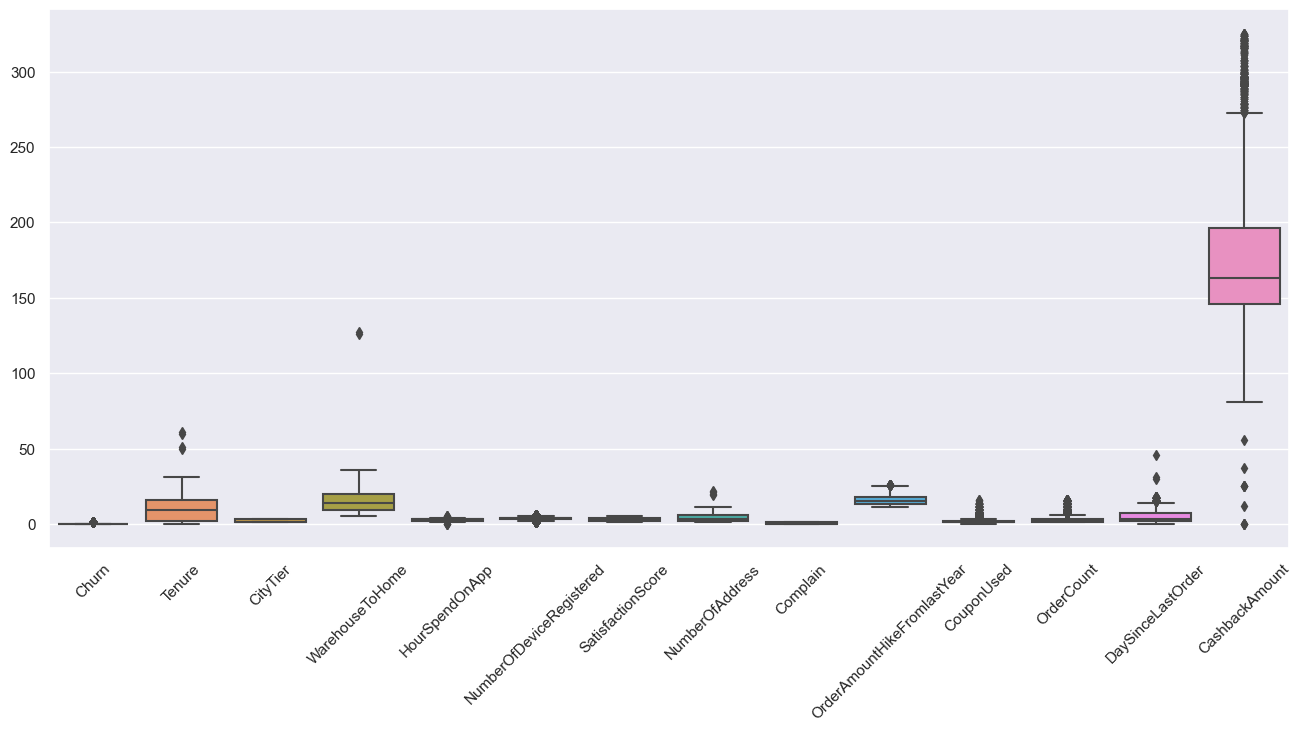

In [18]:
# Let’s now explore if there are any outliers in our feature columns
sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

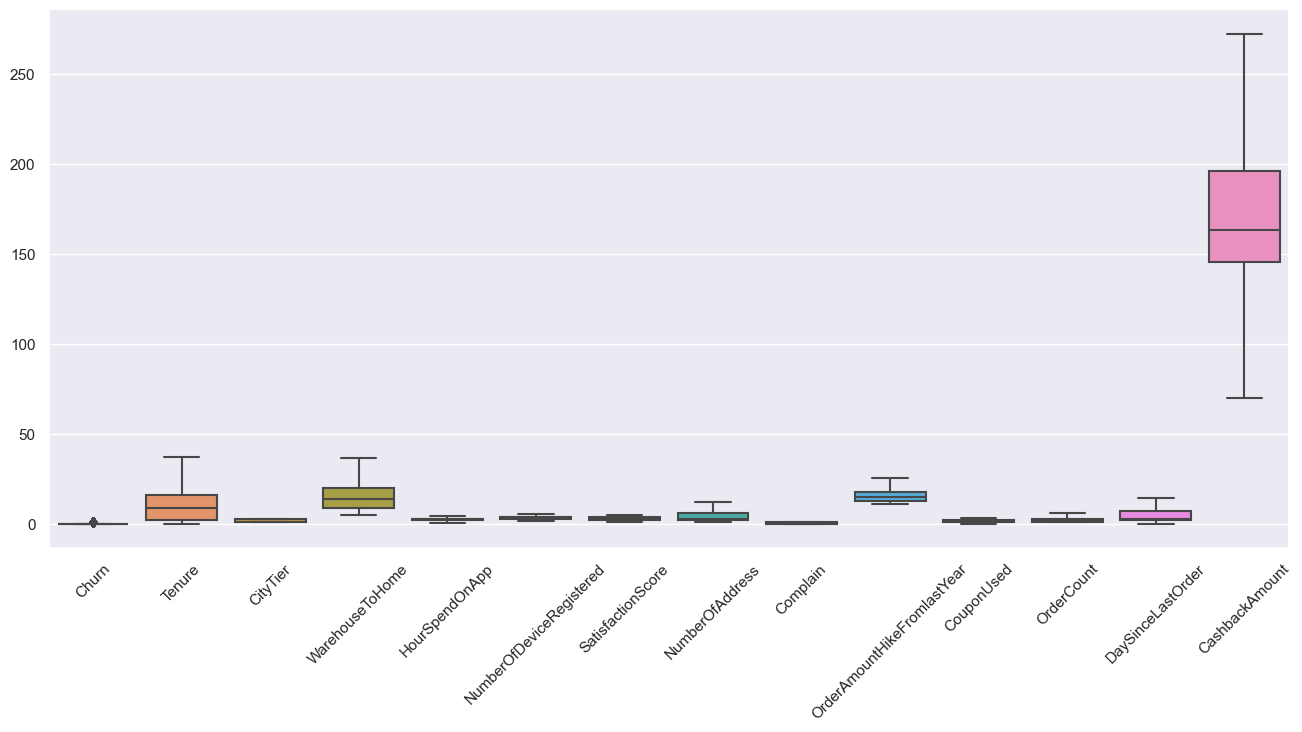

In [19]:
# Handling outliers trong cột dạng số:
cat = df.select_dtypes(include='object').columns # object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('Churn') # là gì
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

sns.set(style="darkgrid", palette="muted")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [20]:
# Explore missing values
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## 2. MISSING VALUES - Handling it by replacing with median:

In [21]:
# Handling the missing values:
# Thay bằng median - do nó ko bị ah bởi outlier, mean thì bị ah bởi outlier:
df.fillna(df.Tenure.median(), inplace=True)
df.fillna(df.WarehouseToHome.median(), inplace=True)
df.fillna(df.HourSpendOnApp.median(), inplace=True)
df.fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace=True)
df.fillna(df.CouponUsed.median(), inplace=True)
df.fillna(df.OrderCount.median(), inplace=True)
df.fillna(df.DaySinceLastOrder.median(), inplace=True)
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## 3. EDA:

In [22]:
# Explore the categories and the frequency
for col in cat:
    print(df[col].value_counts())

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [23]:
# Replace CC with Credit card and COD with Cash on Delivery
df.replace({"CC":"Credit Card", "COD":"Cash on Delivery"}, inplace=True)

### Visualization of categorical variables:

In [ ]:
# Now, we will visualise each variable - with their corresponding churn value (categorical variables)
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(cat, ax.flatten()):
    sns.countplot(x = df[col], hue=df.Churn, ax=subplot)

<img width="1064" alt="Screenshot_4" src="https://github.com/NuongLe123/Python_RFM_analysis/assets/168357450/895a0d47-312f-4322-a3e7-519ef728e647">

### Visualization of numerical variables:

In [ ]:
# Numerical variables
sns.displot(x='Tenure', kde=True, data=df)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

<img width="488" alt="Screenshot_1" src="https://github.com/NuongLe123/Python_RFM_analysis/assets/168357450/07e2a527-f939-459a-a033-ebe152510827">


In [ ]:
sns.displot(x='DaySinceLastOrder', kde=True, data=df)
plt.title("Distribution of Recency of customer orders")
plt.show()

<img width="484" alt="Screenshot_2" src="https://github.com/NuongLe123/Python_RFM_analysis/assets/168357450/32485cb2-1502-45ab-b9e6-1a1347f735fe">


In [ ]:
sns.displot(x='CashbackAmount',kde=True, data=df)
plt.title('Distribution of Cashback for customers')
plt.show()

<img width="495" alt="Screenshot_3" src="https://github.com/NuongLe123/Python_RFM_analysis/assets/168357450/d7c6b710-b4f2-4c20-a71f-11d3079a9aca">


In [ ]:
sns.displot(x='WarehouseToHome', kde=True, data=df)
plt.title("Distribution of distance of Warehouse to customers home")
plt.show()

<img width="499" alt="Screenshot_4" src="https://github.com/NuongLe123/Python_RFM_analysis/assets/168357450/7413d661-e464-4e4a-ad18-ad9e61fe0008">


In [ ]:
sns.displot(x='OrderAmountHikeFromlastYear', kde=True, data=df)
plt.title("Distribution of Percentage increase in customer orders")
plt.show()

<img width="498" alt="Screenshot_5" src="https://github.com/NuongLe123/Python_RFM_analysis/assets/168357450/85c75547-e8a2-42cf-bd69-2fe44a856d86">


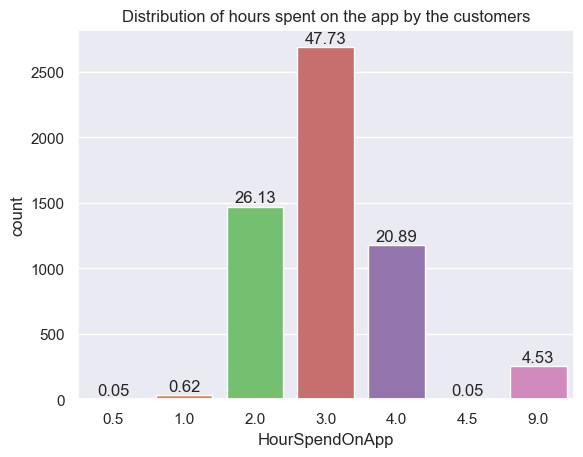

In [211]:
axx = sns.countplot(x='HourSpendOnApp', data=df)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

In [ ]:
sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=df)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

<img width="594" alt="Screenshot_7" src="https://github.com/NuongLe123/Python_RFM_analysis/assets/168357450/8f1802e2-e6f8-4552-bf9e-ad9cc048a6b0">

### Nhận xét:
- Số lượng khách hàng được giữ lại nhiều hơn số khách hàng rời bỏ, **tỷ lệ giữ chân và rời bỏ** xấp xỉ 5 trên 1 nên tỷ lệ rời bỏ rất thấp là điều bình thường
- Khách hàng sử dụng **thẻ (Ghi nợ và tín dụng)** có nhiều khả năng rời bỏ hơn các khách hàng còn lại
- Người dùng **nam** có xu hướng rời bỏ nhiều hơn nữ giới
- **Người độc thân** có tỷ lệ rời bỏ cao hơn các Tình trạng hôn nhân khác
- Hầu hết khách hàng **dành 3 giờ** trên ứng dụng và 94,75% khách hàng **dành từ 2 đến 4 giờ** trên ứng dụng

**Check the correlation between all numeric values**

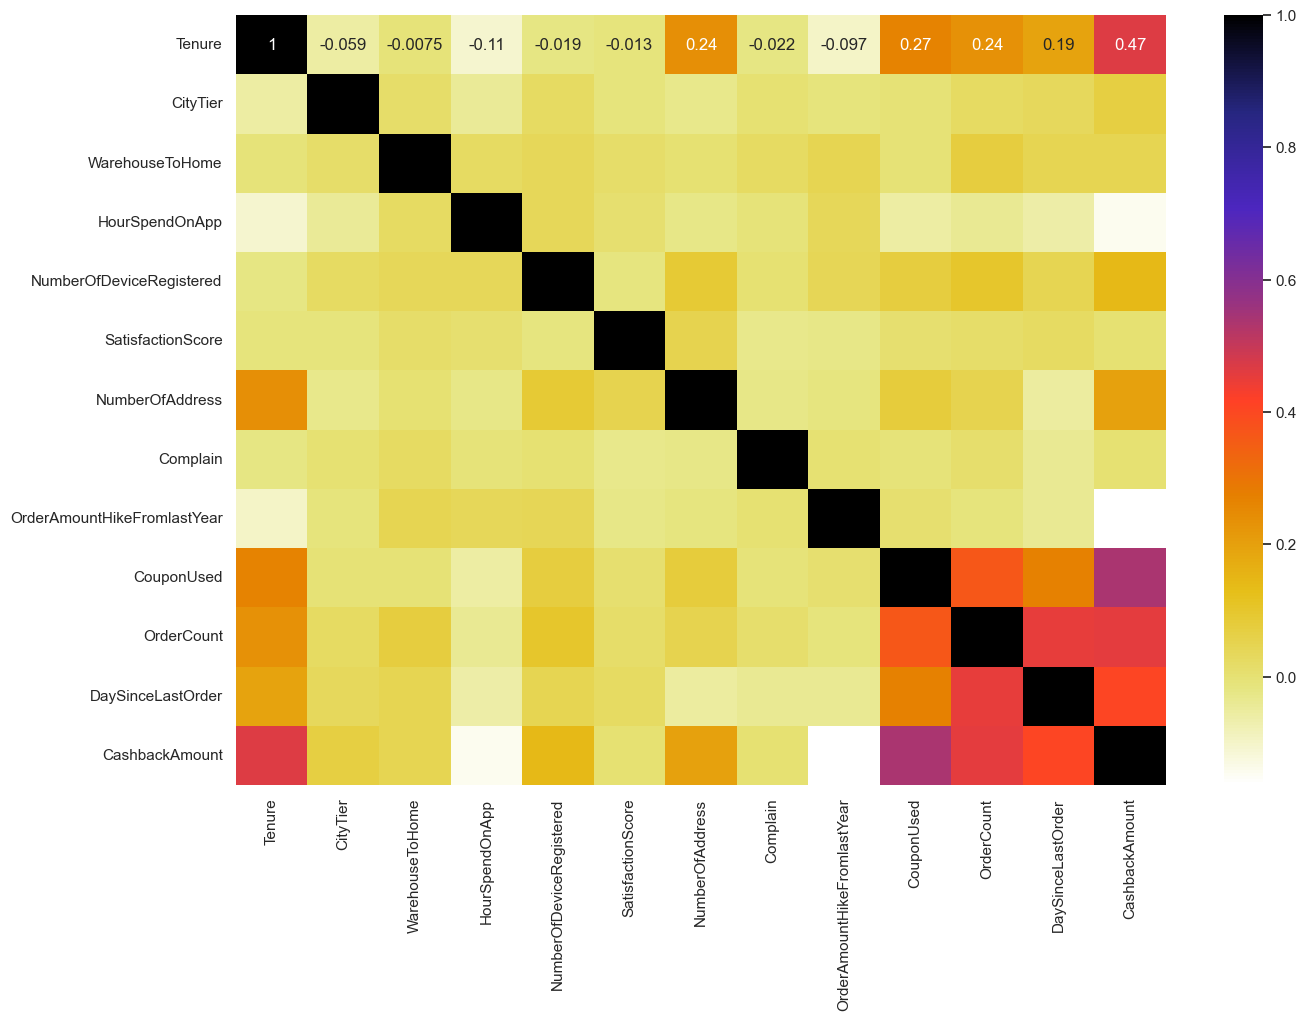

In [213]:
# Segregating categorical and numerical data types from the dataset for efficient analysis and further correlation tests.

# cat = []
# num = []

# for i in df.columns:
#     if df[i].dtype == 'object':
#         cat.append(i)
#     else:
#         num.append(i)
        
plt.figure(figsize=(15,10))
corr = df[num].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [240]:
LogisticRegression(random_state=0)

LogisticRegression(random_state=0)

**Import library**

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# STEP 2: FEATURE TRANSFORMING: 

In [215]:
# encode the categorical data, since machine learning algorithms work on numbers and not text
# dùng hàm select_dtypes, để chỉ chọn các cột dạng object:
cat_df = df.select_dtypes(include='object') 
cat_df

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,Credit Card,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [217]:
# encode categorical variables, and add it to the normal dataset:
encoded = pd.get_dummies(cat_df,drop_first=True)
df_enc = pd.concat([df.drop(cat_df.columns, axis=1), encoded], axis=1)
df_enc

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3.0,2,9,1,11.0,...,False,False,False,False,True,False,False,False,False,True
1,1,9.0,1,8.0,3.0,4.0,3,7,1,15.0,...,False,True,True,False,False,True,False,False,False,True
2,1,9.0,1,30.0,2.0,4.0,3,6,1,14.0,...,False,False,True,False,False,True,False,False,False,True
3,1,0.0,3,15.0,2.0,4.0,5,8,0,23.0,...,False,False,True,False,True,False,False,False,False,True
4,1,0.0,1,12.0,9.0,3.0,5,3,0,11.0,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3.0,2.0,1,6,0,18.0,...,False,False,True,False,True,False,False,False,True,False
5626,0,13.0,1,13.0,3.0,5.0,5,6,0,16.0,...,False,False,True,False,False,False,False,False,True,False
5627,0,1.0,1,11.0,3.0,2.0,4,3,1,21.0,...,False,False,True,False,True,False,False,False,True,False
5628,0,23.0,3,9.0,4.0,5.0,4,4,0,15.0,...,False,False,True,False,True,False,False,False,True,False


# STEP 3: MODEL SELECTION:

Decide to choose 3 models to apply: Logistic Regression, Decision Tree, Random Forest:
- **Linear model**: Linear regression và Logistic Regression đều là linear model. Tức là với 2 model này, mình cần phải **đưa những features mà nó thật sự có mối quan hệ với cột target column** = cái cột mà mình còn dự đoán. Nó phải thực sự có tương quan thì khi đó cái model này mới hoạt động tốt, nó mới cho ra được 1 cái accuracy cao. Nhược điểm là **bước EDA phải làm cẩn thận**.
- **Non-linear model**: Tuy nhiên, đối với 2 model là decision tree & random forest, thì lại là non-linear model, tức là **có thể đưa toàn bộ features vào**, thì 2 model này nó sẽ tự động lọc ra được những cái features nào mà có tương quan cao nhất, thì nó sẽ lấy cái feature đó vào model. 2 cái model này nó học dựa trên cái tree-based. 
- **Random forest**: Mô hình được khuyến khích dùng là Random forest, do nó **giải quyết được vấn đề Overfitting**, vốn là nhược nhược điểm của Decision tree.



# STEP 4: MODEL TRAINING: 
**Split data** into train/test set – **Fit the model** on train set & predict on test set: 

In [218]:
# selecting features and target variable, and splitting the data:
# from sklearn.model_selection import train_test_split

X = df_enc.drop(['Churn'],axis=1) # phải loại bỏ target column = cột churn
y = df_enc['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Cross-validation = Xác thực chéo: 
# Mục đích: Để tránh random split data, để khiến R-square đại diện cho mô hình:
skfcv = StratifiedKFold(n_splits=5)

# STEP 5: MODEL EVALUATION: 
- Chỉ số chính để so sánh 3 models: **Balanced accuracy**. Ngoài ra, dùng **Confusion matrix** và **Overfitting/underfitting**.
- Với **Decision Tree & Random Forest**, thì xem xét: **Feature importance**.


## 1. Apply model 'Logistic Regression':


In [219]:
# Import library:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Build logistic regression pipeline:
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),
                     ('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

# cross validate logistic regression model:
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6037072380553263


Test score for Logistic Regression: 0.6385542168674698
Training score for Logistic Regression: 0.6077963404932378


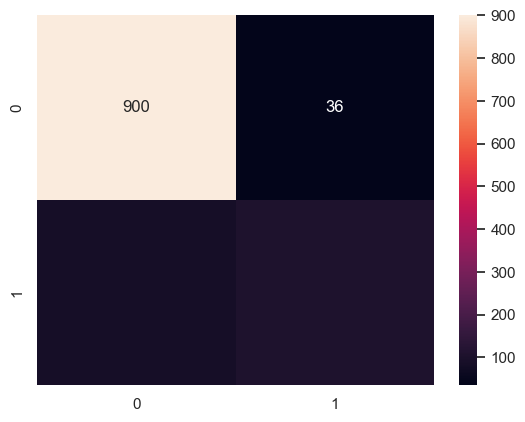

In [220]:
# use logistic regression pipeline, to predict test sample:
log_pipe.fit(X_train,y_train)
print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

**Nhận xét**
- F1 score is a harmonic mean of precision and recall, balancing both metrics. It considers both correctly classified positive cases (precision) and correctly identified positive cases overall (recall).

- The test score (0.638) suggests that the model is correctly classifying around 64% of the data points on average in the test set, considering the balance between precision and recall.
= Mô hình đang phân loại chính xác trung bình khoảng 64% điểm dữ liệu trong tập test.

- The training score (0.608) is slightly lower than the test score. This could indicate a small degree of overfitting, where the model performs better on the data it trained on compared to unseen data. However, the difference is relatively small in this case.
= Mô hình đang phân loại chính xác trung bình khoảng 60% điểm dữ liệu trong tập train. 

## 2. Apply model 'Decision Tree':

In [221]:
# Import necessary libraries:
from sklearn import tree 
from sklearn.metrics import balanced_accuracy_score

# Fit model into train set:
# Dòng 1: A DecisionTreeClassifier object is created, gán tên biến = clf_des.
# Dòng 2: Dùng hàm fit, để cho model học = train the model, 
clf_de_tree = tree.DecisionTreeClassifier()
clf_de_tree.fit(X_train,y_train)

# Apply model on train set and test set:
# Dùng hàm predict, để dự đoán label cho tập train và tập test:
y_tree_pre_train = clf_de_tree.predict(X_train)
y_tree_pre_test = clf_de_tree.predict(X_test)

# Calculate the balanced accuracy on train set and test set to check overfiting and underfiting:
# Nó lấy true labels (y_train or y_test) và predicted labels (y_tree_pre_train or y_tree_pre_test) as arguments.
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_tree_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_tree_pre_test)}')

# Model này: Quite overfitting

Balance accuracy of train set: 1.0
Balance accuracy of test set: 0.9456084120557804


**Nhận xét**:
- Do dataset này có: số lượng khách hàng churn / tổng số khách hàng = 948 / 5630 = 16.83% => Là **Imbalanced data** => **Lý do dùng chỉ số 'Balanced Accuracy'**.

- **Balanced Accuracy of 1.0 on Train Set**: This indicates the model perfectly classified all data points in the training set. This is often a sign of overfitting as the model might have captured noise or irrelevant details in the training data that won't generalize to unseen data.
= Mô hình đã phân loại hoàn hảo tất cả các điểm dữ liệu trong tập huấn luyện.

- **Lower Balanced Accuracy on Test Set**: The model performs worse on the test set, dropping from 1.0 to 0.94. This suggests the model memorized the training data too well, can't handle the slight variations present in the unseen test data.
= Mô hình đã ghi nhớ dữ liệu huấn luyện quá tốt và không thể xử lý các biến thể nhỏ có trong dữ liệu thử nghiệm không nhìn thấy được.

## 3.1. Apply model 'Random Forest':

In [222]:
# Import necessary libraries:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

# Fit model into train set:
# 1. Tạo ra 1 RandomForestClassifier object: 
# Với: max_depth=5: controls the maximum depth of each decision tree in the forest
# Với: max_depth=5: độ sâu tối đa của mỗi tree là 5.
# Với: random_state=0: ensures reproducibility by fixing the randomness used while creating the forest. 
# Với: random_state=0: đảm bảo khả năng tái tạo, bằng cách sửa tính ngẫu nhiên đc dùng trong khi tạo rừn
# 2. Dùng hàm fit, để train model:
clf_rand_fst = RandomForestClassifier(max_depth=5, random_state=0)
clf_rand_fst.fit(X_train, y_train)

# Apply model on train set and test set:
# Dự đoán label y cho tập train và tập test
y_ranf_pre_train = clf_rand_fst.predict(X_train)
y_ranf_pre_test = clf_rand_fst.predict(X_test)

# Calculate the balanced accuracy on train set and test set to check overfiting and underfiting:
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_ranf_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_ranf_pre_test)}')

Balance accuracy of train set: 0.6635573987803349
Balance accuracy of test set: 0.6583502024291499


**Nhận xét**:
- **Train Set: The balanced accuracy is 0.66**, which means the model is correctly classifying roughly 66% of the data points on average, considering all classes. 
= Mô hình đang phân loại chính xác trung bình 66% of the data points.
- **Test Set: The balanced accuracy is 0.66**, which is very similar to the training set score. This is a good sign as it suggests the model is generalizing reasonably well to unseen data and not overfitting significantly.
= Mô hình đang khái quát hóa khá tốt đối với dữ liệu không nhìn thấy.

## 3.2. Show the feature importance of 'Random forest model':

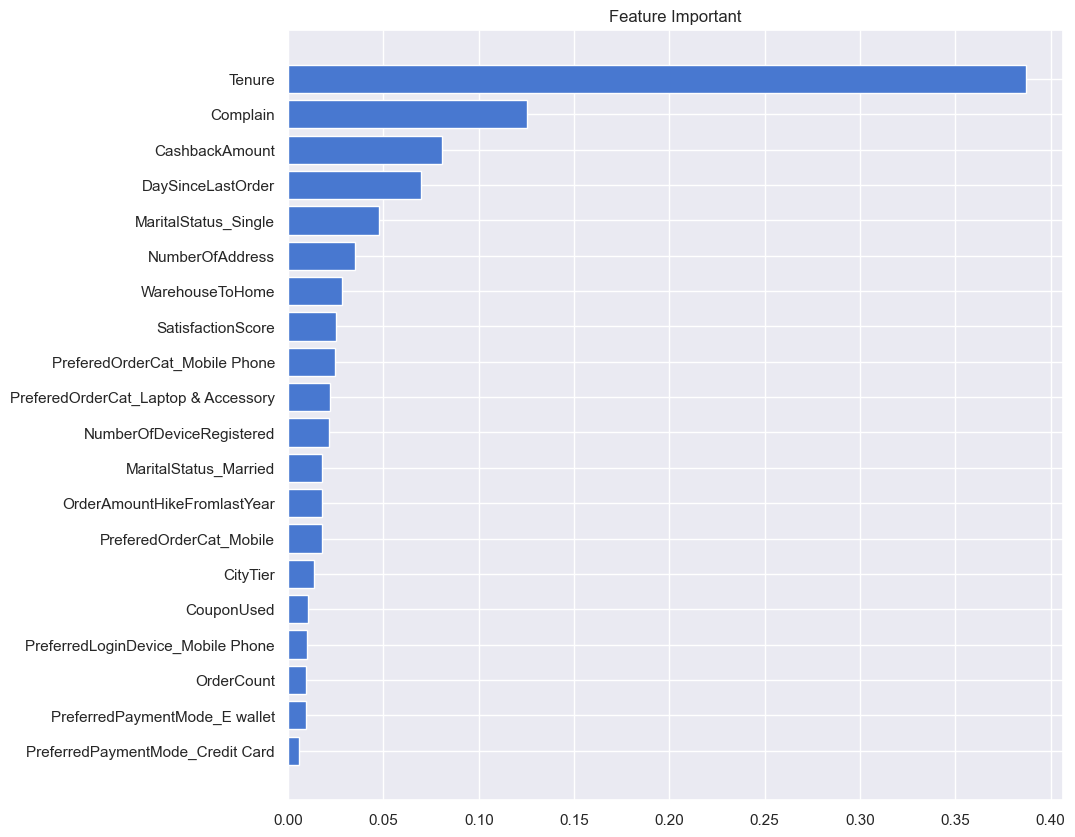

In [223]:
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(X_test.columns, clf_rand_fst.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])
plt.title('Feature Important')

# Show plot
plt.show()

### Nhận xét về 3 models:
- **model 'Decision Tree'**: có chỉ số Balanced accuracy giữa train test và test set bị chênh lệch quá mức, thể hiện nó bị overfitting (1 và 0.95) -> ko nên dùng model này.
- **model 'Random Forest'**: có chỉ số Balanced accuracy giữa train test và test set tương tự nhau (0.66 và 0.65), thể hiện model nắm bắt được underlying patterns trong bộ dataset, và đưa ra những dự đoán hợp lý. -> nên dùng model này.
- **model 'Logistic Regression'**: model đang phân loại chính xác trung bình khoảng 60 và 64% điểm dữ liệu trong tập train và tập test (0.60 và 0.64)
- **Kết luận: nên dùng model 'Random Forest'** vì nó có chỉ số Balanced accuracy giữa train test và test set cao và tương tự nhau.

### Recommendations:
- Từ hình vẽ trên, ta có thể thấy **Top 4 predictors of churn là: Tenure, Complain, CashbackAmount, DaySinceLastOrder**. Do đó, ta sẽ có những recommendations sau cho doanh nghiệp:
- Tăng tenure bằng cách: bắt đầu 1 số **chương trình cho khách hàng thân thiết**, như giảm giá cho họ.- Complains đứng ở vị trí thứ 2, nên doanh nghiệp cần phải đảm bảo **dịch vụ khách hàng** của họ có đủ trình độ để giải quyết các khiếu nại 1 cách chuyên nghiệp.- Ngoài ra, để tăng sự hài lòng của khác hàng,  công ty **cần thực hiện 1 số khảo sát để lấy phản hồi của khách hàng**, từ đó biết được vấn đề cần tập trung và giải quyết nó.- **Tiến hành thử nghiệmm A/B** để nâng cao trải nghiệm người dùng và giao diện người dùng, điều này sẽ nâng cao trải nghiệm khách hàng và tăng tỷ lệ chuyển đổi.

# STEP 6: IMPROVING MODEL ACCURACY BY HYPERPARAMETER TUNING:

In [232]:
from sklearn.model_selection import GridSearchCV

# Input the parameter grid:
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf_rand_fst, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(X_train, y_train)
/
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test set accuracy:  0.9742451154529307


In [233]:
#Apply best hyperparameter model to the data
clf_rf_tunn = RandomForestClassifier(n_estimators=150,
                                    max_depth=20,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    bootstrap=False)
clf_rf_tunn.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=150)

In [234]:
y_rand_tunn_train = clf_rf_tunn.predict(X_train)
y_rand_tunn_test = clf_rf_tunn.predict(X_test)

In [235]:
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_rand_tunn_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_rand_tunn_test)}')

Balance accuracy of train set: 1.0
Balance accuracy of test set: 0.9530476833108412


In [236]:
y_rt_prob = clf_rf_tunn.predict_proba(X_test)[:,1]
y_rt_prob

array([0.02666667, 0.03333333, 0.        , ..., 0.00666667, 0.        ,
       0.        ])

## Probability Threshold Selection:

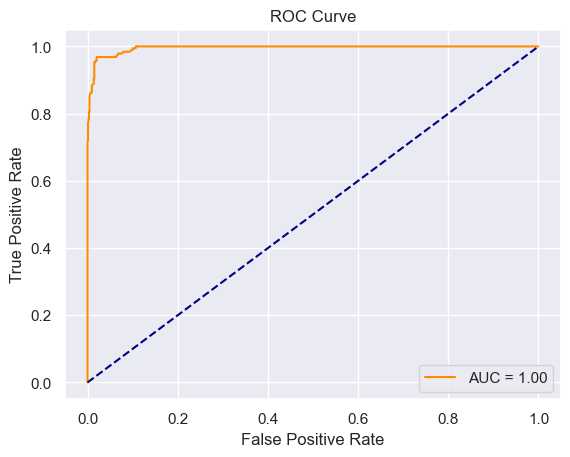

In [237]:
# select threshold for probability:
# 3 thư viện cần dùng:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_rt_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [238]:
# Calculate the distance for each threshold
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)
# Get the threshold for the smallest distance
best_threshold = thresholds[np.argmin(distances)]
print(f"Best threshold: {best_threshold}")

Best threshold: 0.38666666666666666


**Re-apply new threshold for model after apply new hyperparameter:**

In [239]:
threshold = 0.30

y_rt_prob = clf_rf_tunn.predict_proba(X_test)[:,1]  #clf_rand_tun is the model have hyperparameter after tunning

y_pred_prod = (y_rt_prob > threshold).astype(int)


balanced_accuracy = balanced_accuracy_score(y_test, y_pred_prod)
print("Test balanced accurary :", round(balanced_accuracy,5))

Test balanced accurary : 0.96872


## Nhận xét:
- Nhờ có pp HYPERPARAMETER TUNING, mà accuracy của model 'Random Forest' đã tăng từ 0.66 lên thành 0.96.